# Homework 01: Multivariate Parametric Classification
## Mouafak Alsaid Hasan


In [203]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.linalg import cho_factor, cho_solve
import pandas as pd


##Parameters


In [204]:
np.random.seed(4210)
# mean parameters
class_mean_vectors = np.array([[+0.0, +2.5], [-2.5, -2.0], [+2.5,-2.0]])
# standard deviation parameters
class_cov_matrix1 = np.array([[+3.2, +0.0],
                               [+0.0, +1.2]])
class_cov_matrix2 = np.array([[+1.2, -0.8],
                               [-0.8, +1.2]])
class_cov_matrix3 = np.array([[+1.2, +0.8],
                               [+0.8, +1.2]])
# sample sizes
class_sizes = np.array([120, 90, 90])

##Data Generation


In [205]:
# generate random samples
points1 = np.random.multivariate_normal(class_mean_vectors[0], class_cov_matrix1, class_sizes[0])
points2 = np.random.multivariate_normal(class_mean_vectors[1], class_cov_matrix2, class_sizes[1])
points3 = np.random.multivariate_normal(class_mean_vectors[2], class_cov_matrix3, class_sizes[2])
points = np.concatenate((points1, points2, points3))

# generate corresponding labels
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))
K = max(y)

##Plotting Data

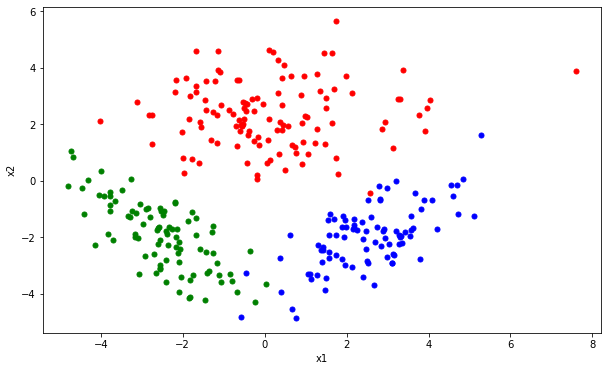

In [206]:
plt.figure(figsize = (10, 6))
# plot data points of the first class
plt.plot(points1[:,0],points1[:,1], "r.", markersize = 10)
# plot data points of the second class
plt.plot(points2[:,0],points2[:,1], "g.", markersize = 10)
# plot data points of the third class
plt.plot(points3[:,0],points3[:,1], "b.", markersize = 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

##Parameter Estimations

In [207]:
# estimating the sample means for the three classes
sample_mean_1 = np.array([(sum(points1[:, 0])/class_sizes[0]), (sum(points1[:, 1])/class_sizes[0])])
sample_mean_2 = np.array([(sum(points2[:, 0])/class_sizes[1]), (sum(points2[:, 1])/class_sizes[1])])
sample_mean_3 = np.array([(sum(points3[:, 0])/class_sizes[2]), (sum(points3[:, 1])/class_sizes[2])])


In [208]:
print(sample_mean_1)
print(sample_mean_2)
print(sample_mean_3)


[0.12279106 2.34170935]
[-2.5223472  -1.95453803]
[ 2.50766057 -2.01508437]


In [209]:
# getting the elements of the covarience matrix. the covarience terms and variences.
varience_x_1 = np.sum((points1[:,0] - sample_mean_1[0])**2)/class_sizes[0]
varience_y_1 = np.sum((points1[:,1] - sample_mean_1[1])**2)/class_sizes[0]
covar_term_1 = np.sum((points1[:,0] - sample_mean_1[0])*(points1[:,1] - sample_mean_1[1]))/class_sizes[0]
varience_x_2 = np.sum((points2[:,0] - sample_mean_2[0])**2)/class_sizes[1]
varience_y_2 = np.sum((points2[:,1] - sample_mean_2[1])**2)/class_sizes[1] 
covaa_term_2 = np.sum((points2[:,0] - sample_mean_2[0])*(points2[:,1] - sample_mean_2[1]))/class_sizes[1]
varience_x_3 = np.sum((points3[:,0] - sample_mean_1[0])**2)/class_sizes[2]
varience_y_3 = np.sum((points3[:,1] - sample_mean_3[1])**2)/class_sizes[2]
covar_term_3 = np.sum((points3[:,0] - sample_mean_3[0])*(points3[:,1] - sample_mean_3[1]))/class_sizes[2]


In [210]:
# the estimated covarience matrix.
sample_cov_matrix_1 = np.array([[varience_x_1, cov_term_1],
                                [cov_term_1, varience_y_1]])
sample_cov_matrix_2 = np.array([[varience_x_2, cov_term_2],
                                [cov_term_2, varience_y_2]])
sample_cov_matrix_3 = np.array([[varience_x_3, cov_term_3],
                                [cov_term_3, varience_y_3]])


In [211]:
print(sample_cov_matrix_1)
print(sample_cov_matrix_2)
print(sample_cov_matrix_3)

[[3.01617847 0.22436503]
 [0.22436503 1.34498151]]
[[ 1.10526278 -1.18878261]
 [-1.18878261  1.45032651]]
[[7.08030228 0.92292252]
 [0.92292252 1.2463311 ]]


In [212]:
# calculate prior probabilities
class_priors = [np.mean(y == (c + 1)) for c in range(K)]
print(class_priors)




[0.4, 0.3, 0.3]


##Calculating the Confusion Matrix

###multivariate Classification

In [218]:
def W_c_matrix(cov_matrix):
  return -0.5 * np.linalg.inv(cov_matrix)

def W_c_vec(cov_matrix, sample_mean):
  return np.dot(np.linalg.inv(cov_matrix), sample_mean)

def W_c_scalar(cov_matrix, sample_mean, prior):
  cov_det = np.linalg.det(cov_matrix)
  cov_inverse = np.linalg.inv(cov_matrix)
  return -0.5 * np.dot(sample_mean.T, np.dot(cov_inverse, sample_mean)) - 0.5 * np.log(np.absolute(cov_det)) + np.log(np.absolute(prior))

def score_function_gc(cov_matrix, sample_mean, prior, input):
  return np.dot(input.T, np.dot(W_c_matrix(cov_matrix), input)) + np.dot(W_c_vec(cov_matrix, sample_mean).T, input) + W_c_scalar(cov_matrix, sample_mean, prior)

score_values = []

for x in points:
  score_1 = score_function_gc(sample_cov_matrix_1, sample_mean_1, class_priors[0], x)
  score_2 = score_function_gc(sample_cov_matrix_2, sample_mean_2, class_priors[1], x)
  score_3 = score_function_gc(sample_cov_matrix_3, sample_mean_3, class_priors[2], x)
  if score_1 > score_2 and score_1 > score_3:
    score_values.append(1)
  elif score_2 > score_3 and score_2 > score_1:
    score_values.append(2)
  elif score_3 > score_1 and score_3 > score_2:
    score_values.append(3)
 


print(len(y))
print(len(score_values))

 

300
300


In [220]:
# calculate confusion matrix

confusion_matrix = pd.crosstab([score_values], [y], rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth    1   2   3
y_pred              
1        119   0   1
2          0  70   1
3          1  20  88


##Boundries Drawing

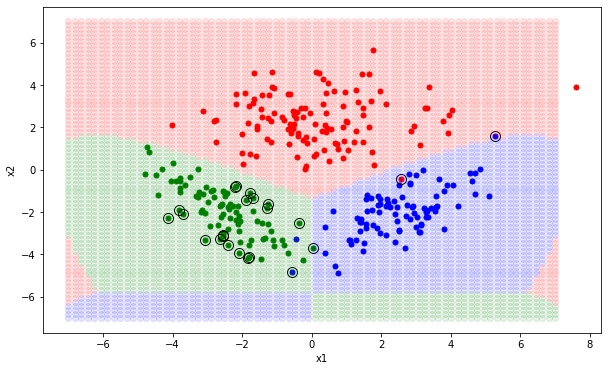

In [222]:
plt.figure(figsize = (10, 6))
# plot data points of the first class
plt.plot(points1[:,0],points1[:,1], "r.", markersize = 10)
# plot data points of the second class
plt.plot(points2[:,0],points2[:,1], "g.", markersize = 10)
# plot data points of the third class
plt.plot(points3[:,0],points3[:,1], "b.", markersize = 10)

for i in range (len(y)):
  if y[i] != score_values[i]:
    plt.plot(points[i,0], points[i,1], "ko", markersize = 10, fillstyle = "none")

x1_interval = np.linspace(-7, +7, 76)
x2_interval = np.linspace(-7, +7, 76)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((len(x1_interval), len(x2_interval), 3))
for i in range(76):
    for j in range(76):
        g1 = np.dot(np.array([x1_interval[i], x2_interval[j]]).T, np.dot(np.array([x1_interval[i], x2_interval[j]]), W_c_matrix(class_cov_matrix1))) + np.dot(np.array([x1_interval[i], x2_interval[j]]), W_c_vec(class_cov_matrix1, class_mean_vectors[0])) + W_c_scalar(class_cov_matrix1, class_mean_vectors[0],class_priors[0])
        g2 = np.dot(np.array([x1_interval[i], x2_interval[j]]).T, np.dot(np.array([x1_interval[i], x2_interval[j]]), W_c_matrix(class_cov_matrix2))) + np.dot(np.array([x1_interval[i], x2_interval[j]]), W_c_vec(class_cov_matrix2, class_mean_vectors[1])) + W_c_scalar(class_cov_matrix2, class_mean_vectors[1],class_priors[1])
        g3 = np.dot(np.array([x1_interval[i], x2_interval[j]]).T, np.dot(np.array([x1_interval[i], x2_interval[j]]), W_c_matrix(class_cov_matrix3))) + np.dot(np.array([x1_interval[i], x2_interval[j]]), W_c_vec(class_cov_matrix3, class_mean_vectors[2])) + W_c_scalar(class_cov_matrix3, class_mean_vectors[2],class_priors[2])
        if g1 > g2 and g1 > g3:
            plt.plot(x1_interval[i], x2_interval[j], 'o', color='red', alpha=0.1)
        elif g2 > g3 and g2 > g1:
            plt.plot(x1_interval[i], x2_interval[j], 'o', color='green', alpha=0.1)
        else:
            plt.plot(x1_interval[i], x2_interval[j], 'o', color='blue', alpha=0.1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
